In [42]:
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [3]:
import re
import mailbox
import csv

In [4]:
china1965 = pd.read_csv('C:/Users/99810471/Desktop/dados/income-1965-china.csv')
china2015 = pd.read_csv('C:/Users/99810471/Desktop/dados/income-1965-usa.csv')
usa1965 = pd.read_csv('C:/Users/99810471/Desktop/dados/income-2015-china.csv')
usa1965 = pd.read_csv('C:/Users/99810471/Desktop/dados/income-2015-usa.csv')

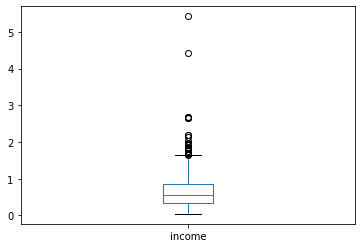

In [5]:
china1965.income.plot(kind='box')

In [6]:
gapminder = pd.read_csv('C:/Users/99810471/Desktop/dados/gapminder.csv')

In [8]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [9]:
italy = gapminder.query('country == "Italy"')

In [10]:
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444
6399,Italy,1820,Europe,20341608.0,29.69,54.531,5.47,2474.0,6.773443
6400,Italy,1830,Europe,21529667.0,29.69,54.667,5.47,2471.0,6.765229
6401,Italy,1840,Europe,22956667.0,29.69,54.804,5.47,2524.0,6.910335


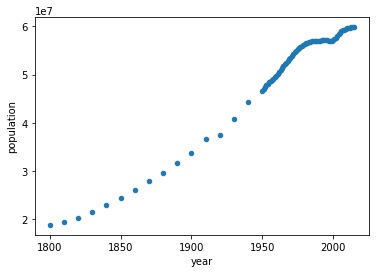

In [11]:
italy.plot.scatter("year", "population")

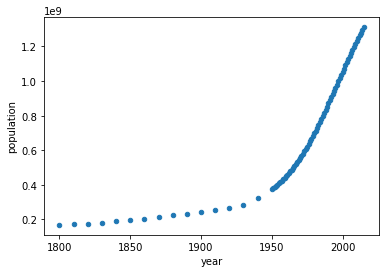

In [14]:
gapminder.query('country == "India"').plot.scatter("year", "population")

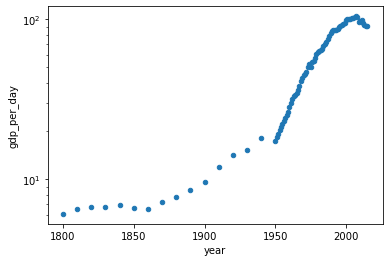

In [16]:
italy.plot.scatter("year", "gdp_per_day", logy=True)

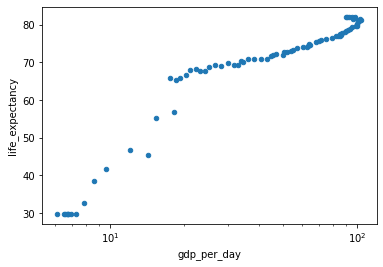

In [17]:
italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True)

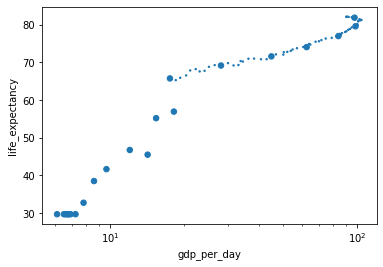

In [19]:
size = np.where(italy.year % 10 == 0,30,2)

italy.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size)

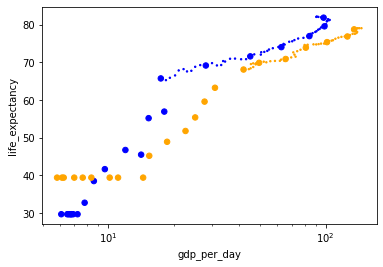

In [23]:
data = gapminder.query('(country == "Italy") or (country == "United States")')
                       
size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'Italy', 'blue', 'orange')

data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

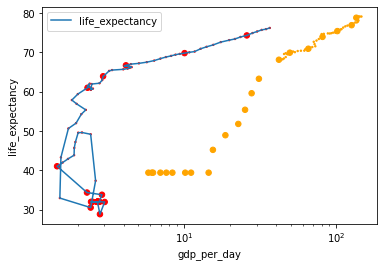

In [25]:
data = gapminder.query('(country == "China") or (country == "United States")')
                       
size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'China', 'red', 'orange')

ax = data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

data[data.country == 'China'].plot.line(x="gdp_per_day", y="life_expectancy", ax=ax)

In [26]:
gapminder = pd.read_csv('C:/Users/99810471/Desktop/dados/gapminder.csv')

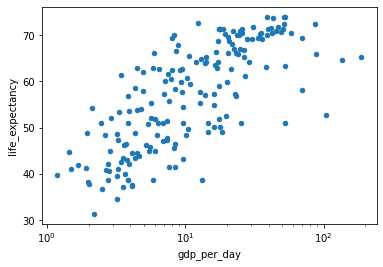

In [27]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    data.plot.scatter("gdp_per_day", "life_expectancy", logx=True)
    
plotyear(1965)

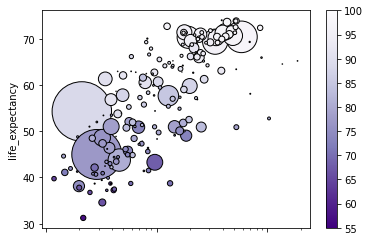

In [31]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, 
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors='k')
    
plotyear(1965)

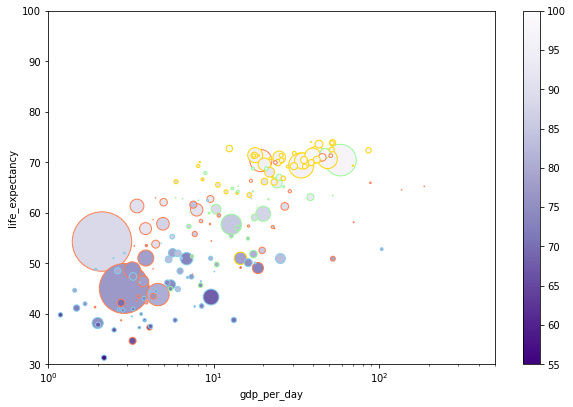

In [34]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, 
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))
    
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    
plotyear(1965)

In [35]:
interact(plotyear,year=range(1965, 2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [36]:
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [37]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

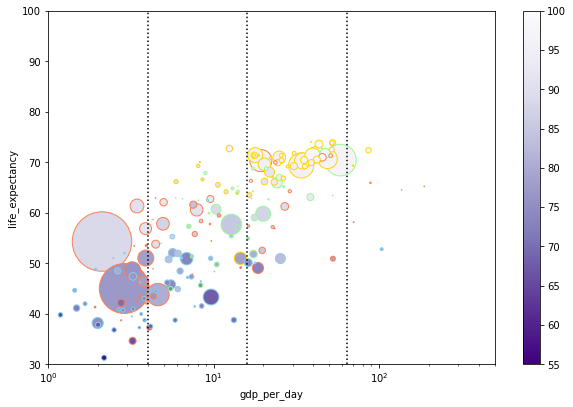

In [38]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, 
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))
    
    for level in [4, 16,64]:
        pp.axvline(level, linestyle=':', color='k')
    
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    
plotyear(1965)

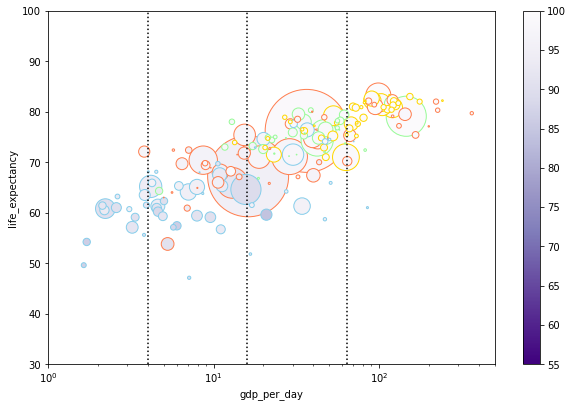

In [44]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, 
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))
    
    for level in [4, 16,64]:
        pp.axvline(level, linestyle=':', color='k')
    
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    
plotyear(2015)